In [1]:
train_dir = 'C:/Users/gayathri.katta/Desktop/Computer_Aided_Diagnosis_for _respiratory_illenss/dataset/train'
test_dir='C:/Users/gayathri.katta/Desktop/Computer_Aided_Diagnosis_for _respiratory_illenss/dataset/test'

In [2]:
batch_size = 1
epochs = 15
img_height = 180
img_width = 180

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 771 images belonging to 4 classes.


In [5]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 304 images belonging to 4 classes.





304/304 [==============================] - 43s 122ms/step - loss: 12.4361 - accuracy: 0.4178


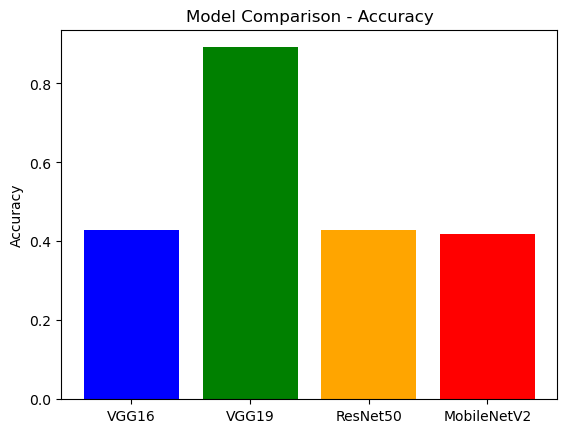

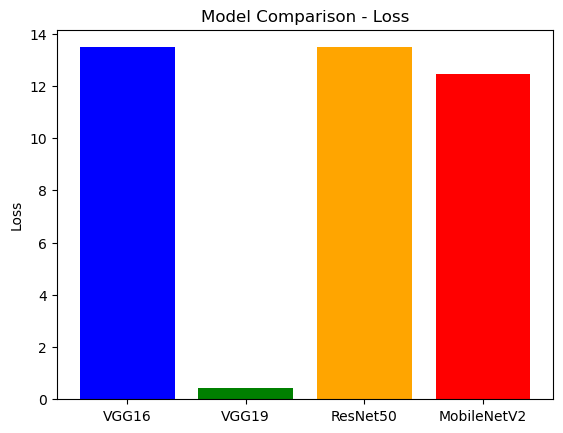

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained models
vgg16_model = load_model('lung.h5')
vgg19_model = load_model('lung_VGG19.h5')
resnet50_model = load_model('lung_resNet50.h5')
mobilenetv2_model = load_model('lung_mobile_netv2.h5')

# Assuming you have validation data generator val_data_gen

# Evaluate each model on the validation set
vgg16_eval = vgg16_model.evaluate(val_data_gen)
vgg19_eval = vgg19_model.evaluate(val_data_gen)
resnet50_eval = resnet50_model.evaluate(val_data_gen)
mobilenetv2_eval = mobilenetv2_model.evaluate(val_data_gen)

# Extract relevant metrics
vgg16_accuracy, vgg16_loss = vgg16_eval[1], vgg16_eval[0]
vgg19_accuracy, vgg19_loss = vgg19_eval[1], vgg19_eval[0]
resnet50_accuracy, resnet50_loss = resnet50_eval[1], resnet50_eval[0]
mobilenetv2_accuracy, mobilenetv2_loss = mobilenetv2_eval[1], mobilenetv2_eval[0]

# Plot the accuracy
accuracies = [vgg16_accuracy, vgg19_accuracy, resnet50_accuracy, mobilenetv2_accuracy]
models = ['VGG16', 'VGG19', 'ResNet50', 'MobileNetV2']

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

# Plot the loss
losses = [vgg16_loss, vgg19_loss, resnet50_loss, mobilenetv2_loss]

plt.bar(models, losses, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Loss')
plt.title('Model Comparison - Loss')
plt.show()
